## Data Preprocessing

In [71]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [72]:
# Run the data preprocessing notebook
data = pd.read_csv('docs/anxiety_attack_dataset.csv')
data

,ID,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Severity of Anxiety Attack (1-10)
0,1,56,Female,Other,9.6,8.3,175,6,No,No,4,145,33,3,No,No,4,Yes,9,10
1,2,46,Male,Teacher,6.4,7.3,97,6,No,No,3,143,18,5,Yes,No,0,No,9,8
2,3,32,Female,Doctor,6.9,1.0,467,14,No,No,2,60,34,1,No,No,7,Yes,10,5
3,4,60,Male,Doctor,9.2,3.7,471,16,No,Yes,6,94,19,1,No,Yes,4,Yes,5,8
4,5,25,Male,Student,9.2,2.5,364,2,No,Yes,7,152,15,4,No,Yes,0,No,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,28,Male,Engineer,4.4,4.1,360,1,Yes,Yes,1,139,20,2,Yes,No,7,No,9,6
11996,11997,49,Female,Doctor,9.9,2.2,433,4,No,Yes,4,150,33,2,No,No,3,No,5,6
11997,11998,23,Female,Student,9.8,8.1,140,19,Yes,No,2,81,33,2,No,No,8,No,1,10
11998,11999,52,Male,Teacher,5.9,6.6,114,12,No,No,9,90,14,5,No,No,3,No,9,5


In [73]:
# There are not duplicated rows in the dataset
data.duplicated().value_counts()

False    12000
Name: count, dtype: int64

In [74]:
# There are not Na's in the data
for column in data:
    print(data[column].isna().value_counts())
    print(" ")

ID
False    12000
Name: count, dtype: int64
 
Age
False    12000
Name: count, dtype: int64
 
Gender
False    12000
Name: count, dtype: int64
 
Occupation
False    12000
Name: count, dtype: int64
 
Sleep Hours
False    12000
Name: count, dtype: int64
 
Physical Activity (hrs/week)
False    12000
Name: count, dtype: int64
 
Caffeine Intake (mg/day)
False    12000
Name: count, dtype: int64
 
Alcohol Consumption (drinks/week)
False    12000
Name: count, dtype: int64
 
Smoking
False    12000
Name: count, dtype: int64
 
Family History of Anxiety
False    12000
Name: count, dtype: int64
 
Stress Level (1-10)
False    12000
Name: count, dtype: int64
 
Heart Rate (bpm during attack)
False    12000
Name: count, dtype: int64
 
Breathing Rate (breaths/min)
False    12000
Name: count, dtype: int64
 
Sweating Level (1-5)
False    12000
Name: count, dtype: int64
 
Dizziness
False    12000
Name: count, dtype: int64
 
Medication
False    12000
Name: count, dtype: int64
 
Therapy Sessions (per month)
Fa

###### Homogeneous preprocessing


Class distribution for 'Dizziness':
Dizziness
0    70.05
1    29.95
Name: proportion, dtype: float64


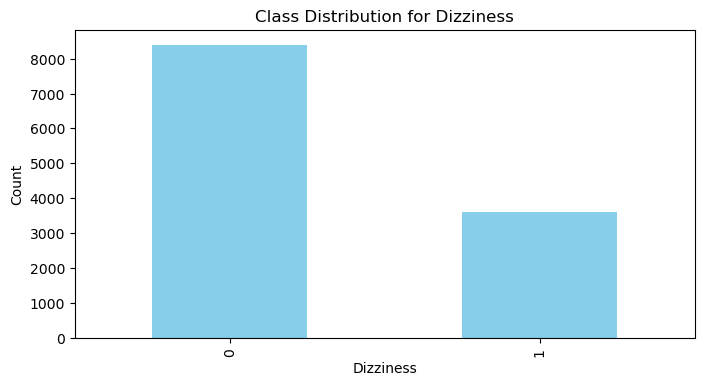


Class distribution for 'Medication':
Medication
0    80.041667
1    19.958333
Name: proportion, dtype: float64


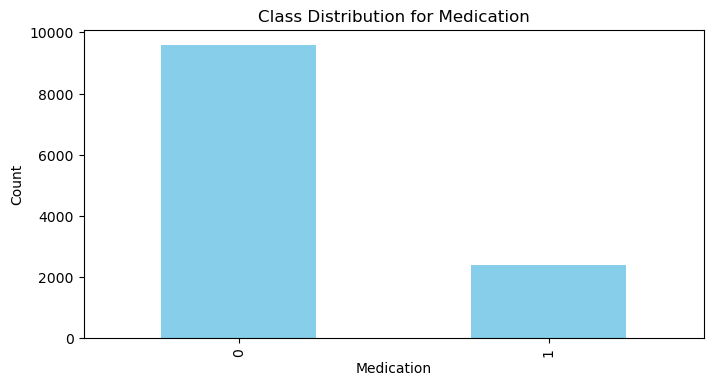


Class distribution for 'Smoking':
Smoking
0    70.141667
1    29.858333
Name: proportion, dtype: float64


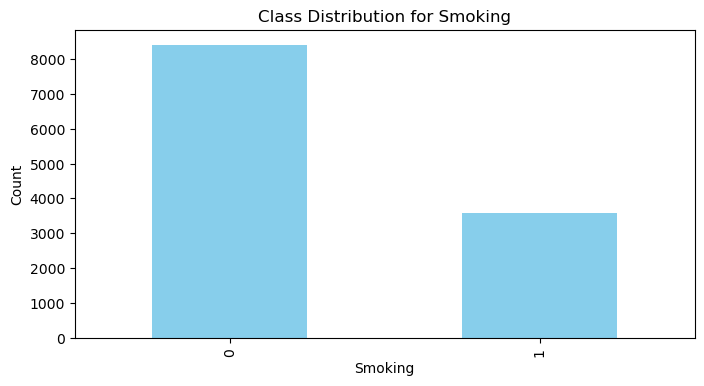


Class distribution for 'Recent Major Life Event':
Recent Major Life Event
0    75.45
1    24.55
Name: proportion, dtype: float64


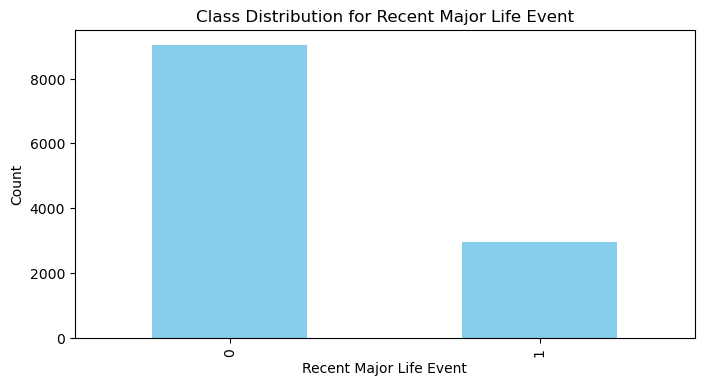


Class distribution for 'Family History of Anxiety':
Family History of Anxiety
0    59.825
1    40.175
Name: proportion, dtype: float64


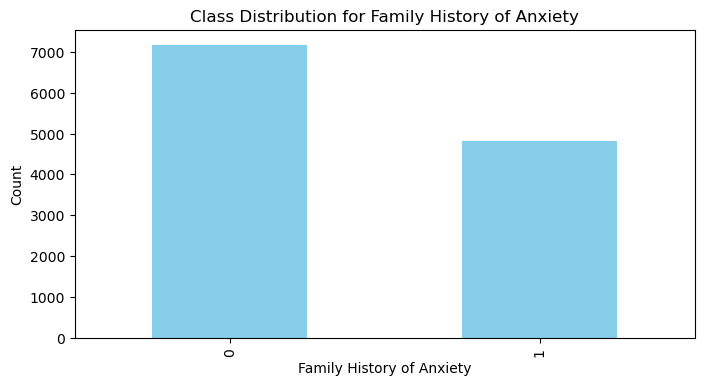


Class distribution for 'Occupation':
Occupation
Unemployed    17.825
Doctor        16.700
Teacher       16.500
Other         16.425
Student       16.275
Engineer      16.275
Name: proportion, dtype: float64


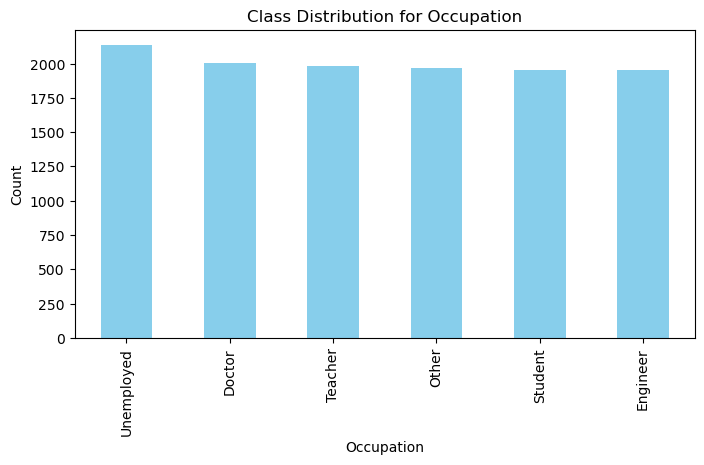


Class distribution for 'Gender':
Gender
Female    48.408333
Male      47.691667
Other      3.900000
Name: proportion, dtype: float64


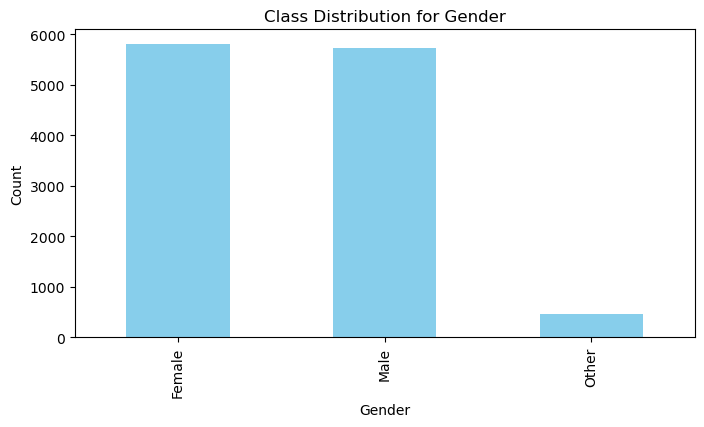

Age
0-18      246
19-30    3040
31-40    2616
41-50    2582
51-60    2501
61-70    1015
Name: count, dtype: int64


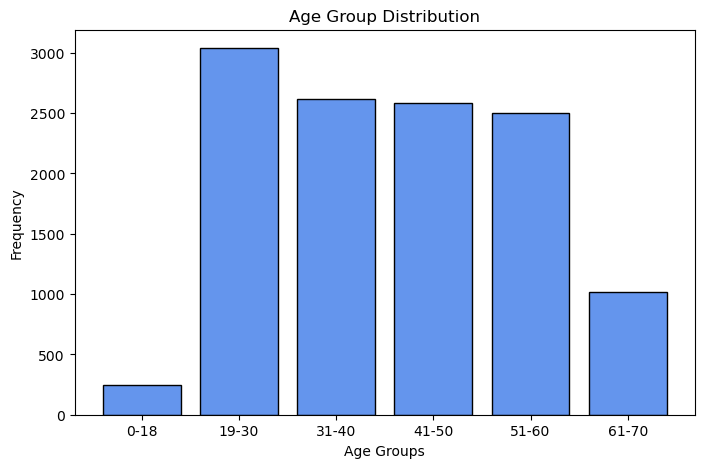

,ID,Age,Gender,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),...,Occupation_Unemployed,Age_0-18,Age_19-30,Age_31-40,Age_41-50,Age_51-60,Age_61-70,Gender_Female,Gender_Male,Gender_Other
0,1,56,Female,9.6,8.3,175,6,0,0,4,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,2,46,Male,6.4,7.3,97,6,0,0,3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,3,32,Female,6.9,1.0,467,14,0,0,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,60,Male,9.2,3.7,471,16,0,1,6,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,5,25,Male,9.2,2.5,364,2,0,1,7,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [75]:
# 1. Handle Binary Categorical Variables
binary_cols = ['Dizziness', 'Medication', 'Smoking', 'Recent Major Life Event', "Family History of Anxiety"]
for col in binary_cols:
    data[col] = data[col].map({'Yes': 1, 'No': 0})
    
# Check class distribution for each categorical variable
categorical_cols= binary_cols+['Occupation']+['Gender']
for col in categorical_cols:
    print(f"\nClass distribution for '{col}':")
    class_counts = data[col].value_counts(normalize=True) * 100  # Percentage distribution
    print(class_counts)
    # Plot class distribution
    plt.figure(figsize=(8, 4))
    data[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Class Distribution for {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()
    
# 2. One-Hot Encoding for Multi-Class Categorical Variables
encoder = OneHotEncoder(drop='first')
encoded_cols = encoder.fit_transform(data[['Occupation']])
encoded_df = pd.DataFrame(
    encoded_cols.toarray(),  # Explicitly convert to dense array
    columns=encoder.get_feature_names_out(['Occupation'])
)
data = pd.concat([data.drop(['Occupation'], axis=1), encoded_df], axis=1)

Age = data['Age']
bins = [0, 18, 30, 40, 50, 60, 70]
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61-70']

# Create age groups
groups = pd.cut(Age, bins=bins, labels=labels)

# Count occurrences in each group
group_counts = groups.value_counts().sort_index()

# Display group counts
print(group_counts)

# Plot the distribution
plt.figure(figsize=(8, 5))
plt.bar(group_counts.index, group_counts.values, color='cornflowerblue', edgecolor='black')
plt.title('Age Group Distribution')
plt.xlabel('Age Groups')
plt.ylabel('Frequency')
plt.show()

# One hot-encoding
ohe = OneHotEncoder(sparse_output=False).set_output(transform='pandas')
array = ohe.fit_transform(groups.to_frame())
data = pd.concat([data,array], axis=1)

Gender = data['Gender']
# One hot-encoding
ohe = OneHotEncoder(sparse_output=False).set_output(transform='pandas')
array = ohe.fit_transform(data[['Gender']])
data = pd.concat([data,array], axis=1)
data.head()

 Detecting outliers and visualizing the distribution of numerical variables:

Sleep Hours: 0 outliers detected


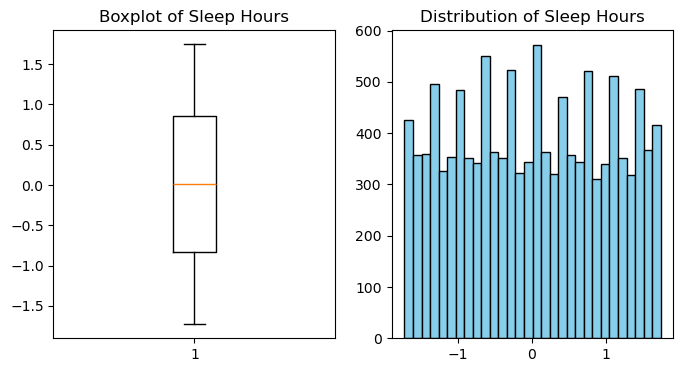

Physical Activity (hrs/week): 0 outliers detected


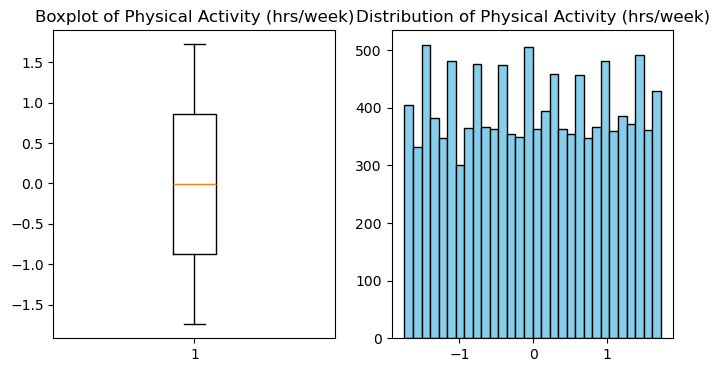

Caffeine Intake (mg/day): 0 outliers detected


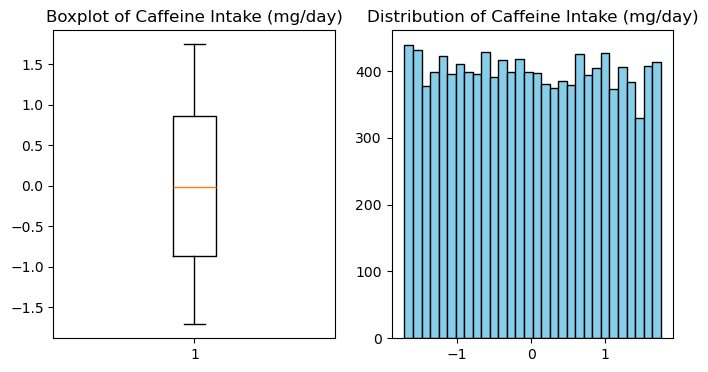

Alcohol Consumption (drinks/week): 0 outliers detected


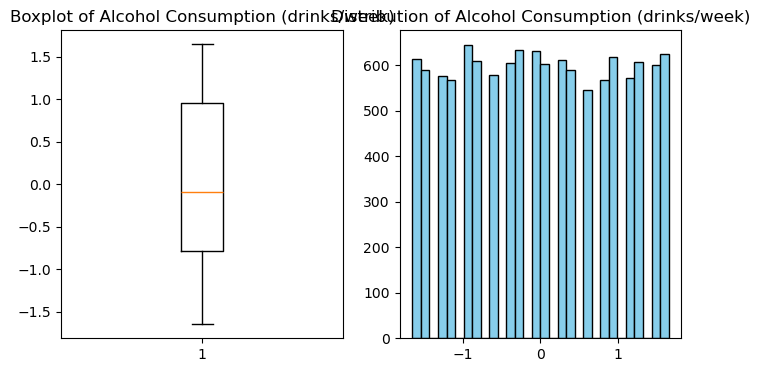

Therapy Sessions (per month): 0 outliers detected


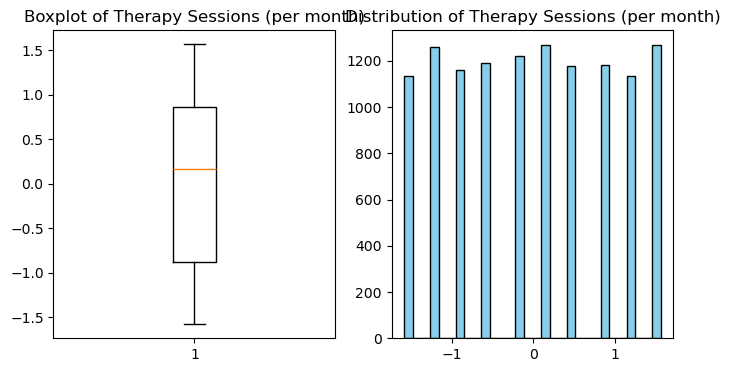

Diet Quality (1-10): 0 outliers detected


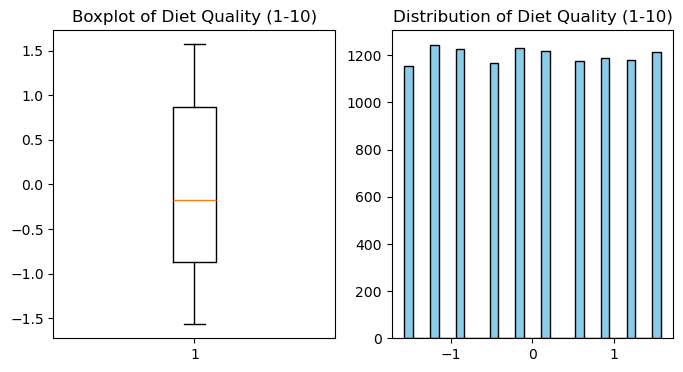

Stress Level (1-10): 0 outliers detected


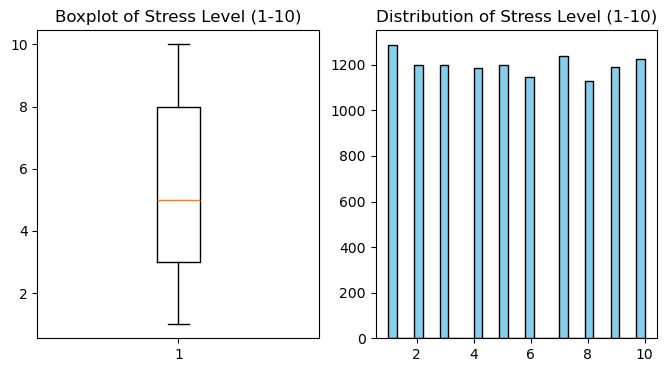

Heart Rate (bpm during attack): 0 outliers detected


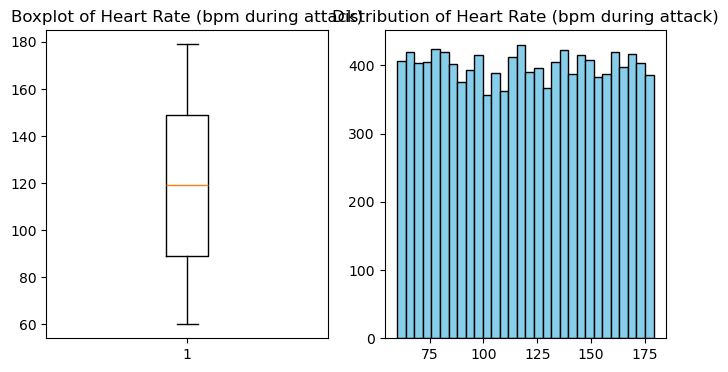

Breathing Rate (breaths/min): 0 outliers detected


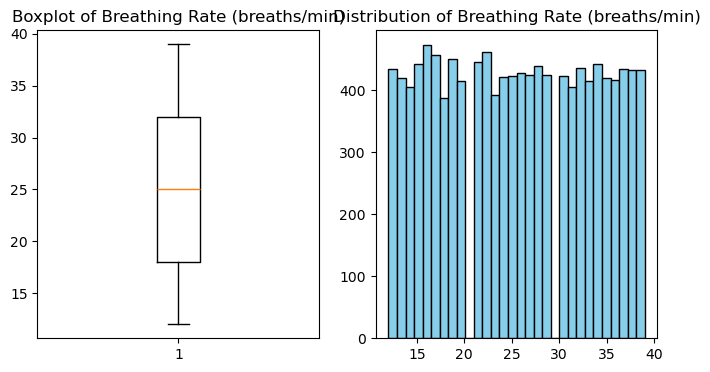

Sweating Level (1-5): 0 outliers detected


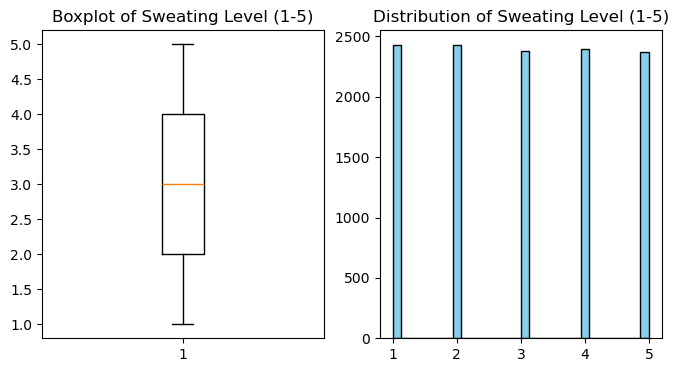


 Summary of detected outliers:
- Sleep Hours: 0 outliers
- Physical Activity (hrs/week): 0 outliers
- Caffeine Intake (mg/day): 0 outliers
- Alcohol Consumption (drinks/week): 0 outliers
- Therapy Sessions (per month): 0 outliers
- Diet Quality (1-10): 0 outliers
- Stress Level (1-10): 0 outliers
- Heart Rate (bpm during attack): 0 outliers
- Breathing Rate (breaths/min): 0 outliers
- Sweating Level (1-5): 0 outliers

 Numerical variables successfully normalized.


,ID,Age,Gender,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),...,Occupation_Unemployed,Age_0-18,Age_19-30,Age_31-40,Age_41-50,Age_51-60,Age_61-70,Gender_Female,Gender_Male,Gender_Other
0,1,56,Female,1.547225,1.131618,-0.496232,-0.605436,0,0,-0.504732,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,2,46,Male,-0.041021,0.785463,-1.036095,-0.605436,0,0,-0.849907,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,3,32,Female,0.207142,-1.395313,1.524795,0.781257,0,0,-1.195082,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,60,Male,1.348694,-0.460695,1.552480,1.127930,0,1,0.185618,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,5,25,Male,1.348694,-0.876081,0.811898,-1.298782,0,1,0.530793,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,28,Male,-1.033675,-0.322233,0.784213,-1.472119,1,1,-1.540258,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11996,11997,49,Female,1.696123,-0.979927,1.289470,-0.952109,0,1,-0.504732,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
11997,11998,23,Female,1.646490,1.062387,-0.738478,1.647940,1,0,-1.195082,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11998,11999,52,Male,-0.289185,0.543155,-0.918432,0.434584,0,0,1.221143,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [77]:
# 3. Normalize Numerical Variables
numerical_cols = [
    'Sleep Hours', 
    'Physical Activity (hrs/week)', 
    'Caffeine Intake (mg/day)', 
    'Alcohol Consumption (drinks/week)', 
    'Therapy Sessions (per month)', 
    'Diet Quality (1-10)',
    "Stress Level (1-10)",
    "Heart Rate (bpm during attack)",
    "Breathing Rate (breaths/min)",
    "Sweating Level (1-5)"
]
def detect_outliers_and_normalize(data, numerical_cols):
    print(" Detecting outliers and visualizing the distribution of numerical variables:\n")

    outliers_info = {}

    for col in numerical_cols:
        # Calculate the Interquartile Range (IQR)
        Q1 = data[col].quantile(0.25)  # First quartile
        Q3 = data[col].quantile(0.75)  # Third quartile
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Detect outliers
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
        num_outliers = len(outliers)
        outliers_info[col] = num_outliers

        # Display outlier information
        print(f"{col}: {num_outliers} outliers detected")

        # Visualize the variable distribution with a boxplot
        plt.figure(figsize=(8, 4))
        plt.subplot(1, 2, 1)
        plt.boxplot(data[col])
        plt.title(f'Boxplot of {col}')

        # Visualize with a histogram
        plt.subplot(1, 2, 2)
        plt.hist(data[col], bins=30, color='skyblue', edgecolor='black')
        plt.title(f'Distribution of {col}')

        plt.show()

    print("\n Summary of detected outliers:")
    for col, count in outliers_info.items():
        print(f"- {col}: {count} outliers")

    # Normalize numerical variables with StandardScaler
    scaler = StandardScaler()
    data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

    print("\n Numerical variables successfully normalized.")

    return data
detect_outliers_and_normalize(data, numerical_cols)


##### data split

In [ ]:
train, test =train_test_split(
    data,
    test_size=0.2,

    random_state=0,
    shuffle=True,
    stratify=data['Severity of Anxiety Attack (1-10)']
)

train_X = train.drop(columns=['Severity of Anxiety Attack (1-10)'])
train_Y = train['Severity of Anxiety Attack (1-10)']
test_X = test.drop(columns=['Severity of Anxiety Attack (1-10)'])
test_Y = test['Severity of Anxiety Attack (1-10)']